In [ ]:
# 
#    COURSE: Neural signal processing and analysis: Zero to hero
#   SESSION: Problem set: Spectral analyses of real and simulated data
#   TEACHER: Mike X Cohen, sincxpress.com
# 

In [28]:
import numpy as np
import mne
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal
from scipy.fft import fft, ifft

In [ ]:
#  1) Generate 10 seconds of data at 1 kHz, comprising 4 sine waves with different 
#     frequencies (between 1 and 30 Hz) and different amplitudes.
#     Plot the individual sine waves, each in its own plot. In separate subplots,
#     plot the summed sine waves with (1) a little bit of noise and (2) a lot of noise.
#  

In [18]:
t = 10 # seconds
srate = 1000
frex = [5, 15, 20, 25]
amplit = [20, 5, 15, 10]
phases = [0.5, 1, 1.5, 2]
time = np.arange(-1, 1, 1/srate)

In [19]:
sine_waves = np.zeros(shape=(len(frex), len(time)))

for i in range(len(frex)):
    sine_waves[i,:] = amplit[i]*np.sin(2*np.pi*frex[i]*time + phases[i])

In [64]:
littleNoise = np.random.randn(len(time))*10
lotsOfNoise = np.random.randn(len(time))*50

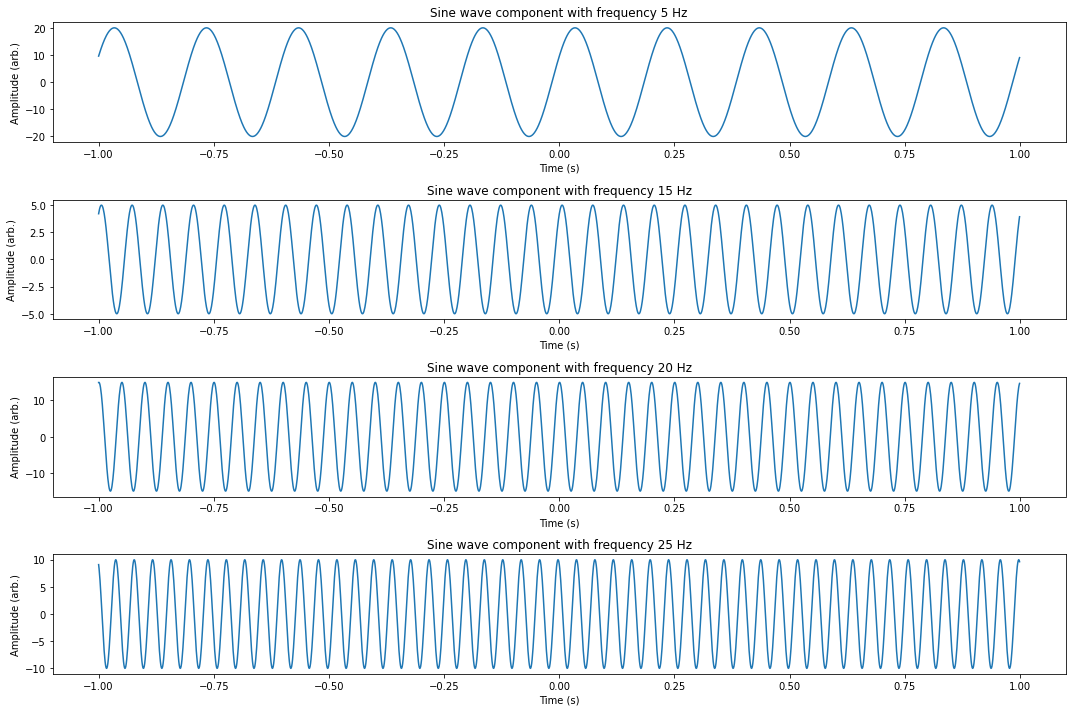

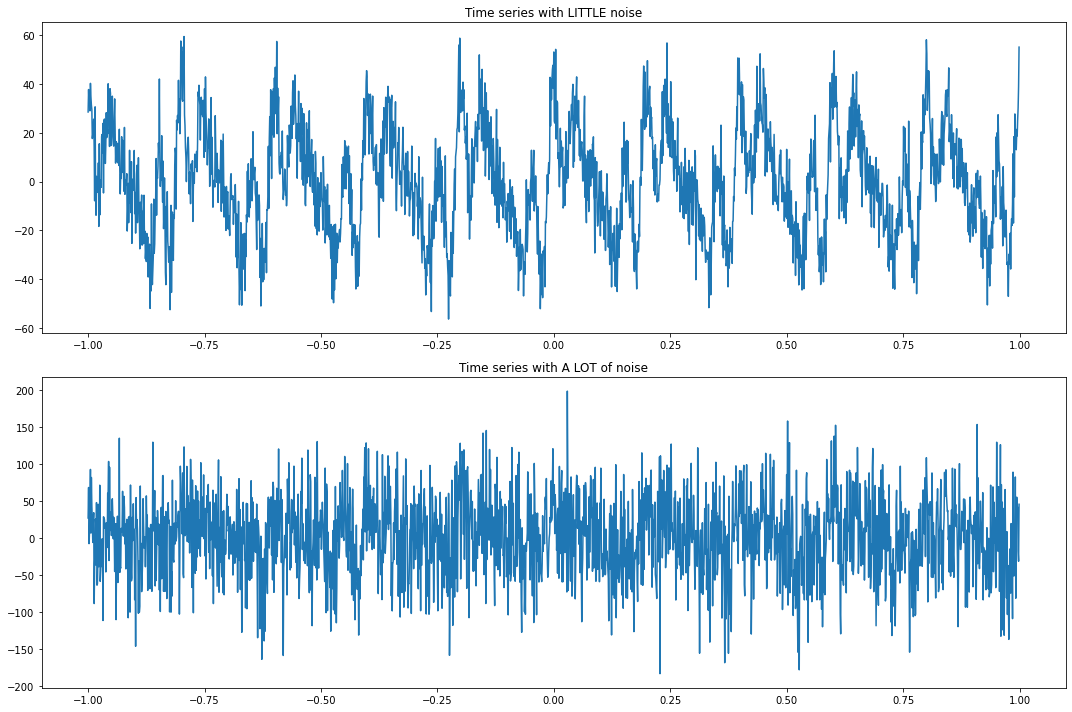

In [67]:
plt.figure(figsize=(15,10))

#  plot constituent sine waves (without noise)
for snum in range(4):
    plt.subplot(4,1,snum+1)
    plt.plot(time,sine_waves[snum, :])
    plt.title(f'Sine wave component with frequency {frex[snum]} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (arb.)')
plt.tight_layout()
plt.show()

#  plot summed sine waves with little noise
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(time, sine_waves.sum(0)+littleNoise)
plt.title('Time series with LITTLE noise')

plt.subplot(212)
plt.plot(time, sine_waves.sum(0)+lotsOfNoise)
plt.title('Time series with A LOT of noise')
plt.tight_layout()
plt.show()

In [ ]:
#  2) Compute the power spectrum of the simulated time series (use FFT) and plot the results, 
#     separately for a little noise and a lot of noise. Show frequencies 0 to 35 Hz.
#     How well are the frequencies reconstructed, and does this depend on noise?
#  

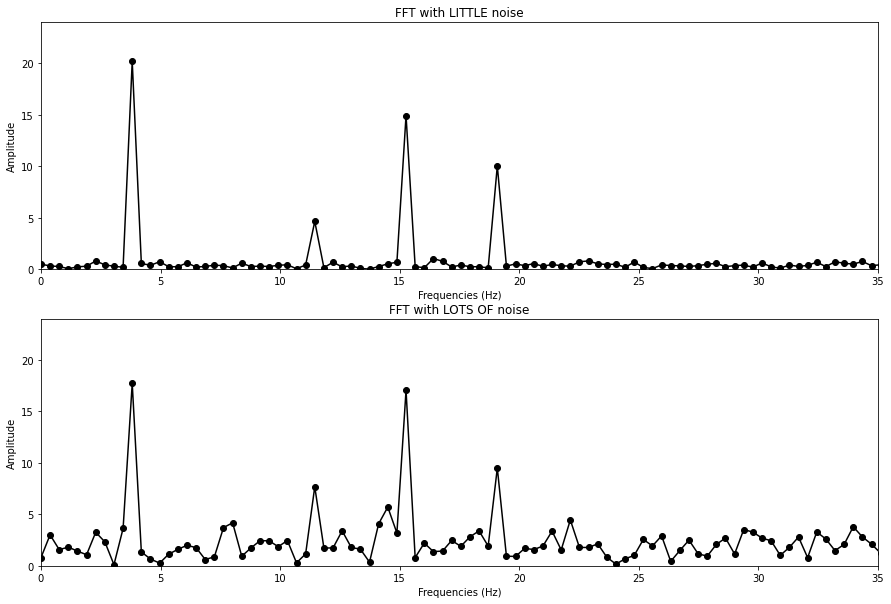

In [69]:
plt.figure(figsize=(15,10))

for noisei in range(2):
    
    # FFT
    if noisei==0:
        f = fft(sine_waves.sum(0) + littleNoise)/len(time)
    else:
        f = fft(sine_waves.sum(0) + lotsOfNoise)/len(time)
    
    # compute frequencies in Hz
    hz = np.linspace(0, srate, int(len(time)))
    
    # plot
    plt.subplot(2,1,noisei+1)
    plt.plot(hz, 2*np.abs(f[:len(hz)]),'k-o')
    plt.xlabel('Frequencies (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 35])
    plt.ylim([0, np.max(amplit)*1.2])
    
    if noisei==0:
        plt.title('FFT with LITTLE noise')
    else:
        plt.title('FFT with LOTS OF noise')
        
plt.show()

In [ ]:
#  3) Compute the power spectrum of data from electrode 7 in the laminar V1 data. 
#     First, compute the power spectrum separately for each trial and then average the power 
#     results together. Next, average the trials together and then compute the power spectrum. 
#     Do the results look similar or different, and are you surprised? Why might they look 
#     similar or different?
#  

In [40]:
eeg_data = loadmat('../data/v1_laminar.mat')
eeg_data['csd'].shape

(16, 1527, 200)

In [245]:
srate = eeg_data['srate'][0][0]
srate

762.939453125

In [44]:
#  pick which channel
chan2use = 6

In [117]:
#  FFT of all trials individually (note that you can do it in one line!)
powspectSeparate = fft(eeg_data['csd'][chan2use,:,:],  axis=0)/1527
#  Then average the single-trial spectra together (average over trials, not over frequencies)
powspectSeparate = (np.mean(2*np.abs(powspectSeparate),1))**2

In [118]:
#  now average first, then take the FFT of the trial average
powspectAverage = fft(np.mean(eeg_data['csd'][chan2use,:,:], 1))/1527
powspectAverage = (2*np.abs(powspectAverage))**2

In [119]:
hz = np.linspace(0, srate, int(eeg_data['timevec'].shape[1]))

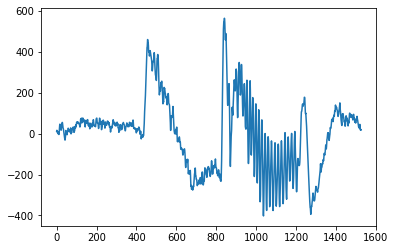

In [120]:
plt.plot(np.mean(eeg_data['csd'][chan2use,:,:], 1))

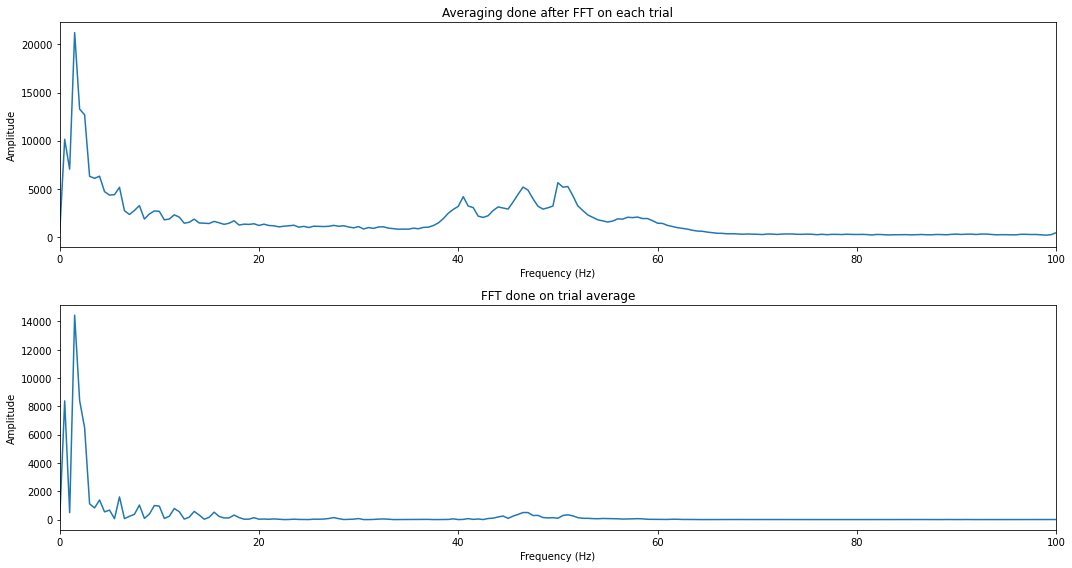

In [121]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(hz, powspectSeparate[:len(hz)])
plt.xlim([0, 100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Averaging done after FFT on each trial')

plt.subplot(212)
plt.plot(hz,powspectAverage[:len(hz)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, 100])
plt.title('FFT done on trial average')

plt.tight_layout()
plt.show()

In [ ]:
#  4) Do the same as above but for electrode 1. Plot the results on top of the previous ones.
#     How do these results compare to the results from channel 7, and does this depend on
#     whether you average first in the time-domain or average the individual power spectra?
#  ANATOMICAL NOTE: channel 7 is around L4; channel 1 is in the hippocampus.

#  This code is just copied from the previous cell. I changed the channel number,
#   I set 'hold on' when calling each subplot, and I specified a different color and a legend.

In [122]:
chan2use = 0

In [123]:
#  FFT of all trials individually (note that you can do it in one line!)
powspectSeparate = fft(eeg_data['csd'][chan2use,:,:],  axis=0)/1527
#  Then average the single-trial spectra together (average over trials, not over frequencies)
powspectSeparate = (np.mean(2*np.abs(powspectSeparate),1))**2

In [124]:
#  now average first, then take the FFT of the trial average
powspectAverage = fft(np.mean(eeg_data['csd'][chan2use,:,:], 1))/1527
powspectAverage = (2*np.abs(powspectAverage))**2

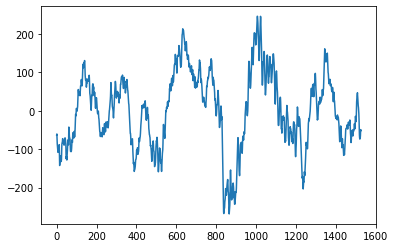

In [125]:
plt.plot(np.mean(eeg_data['csd'][chan2use,:,:], 1))

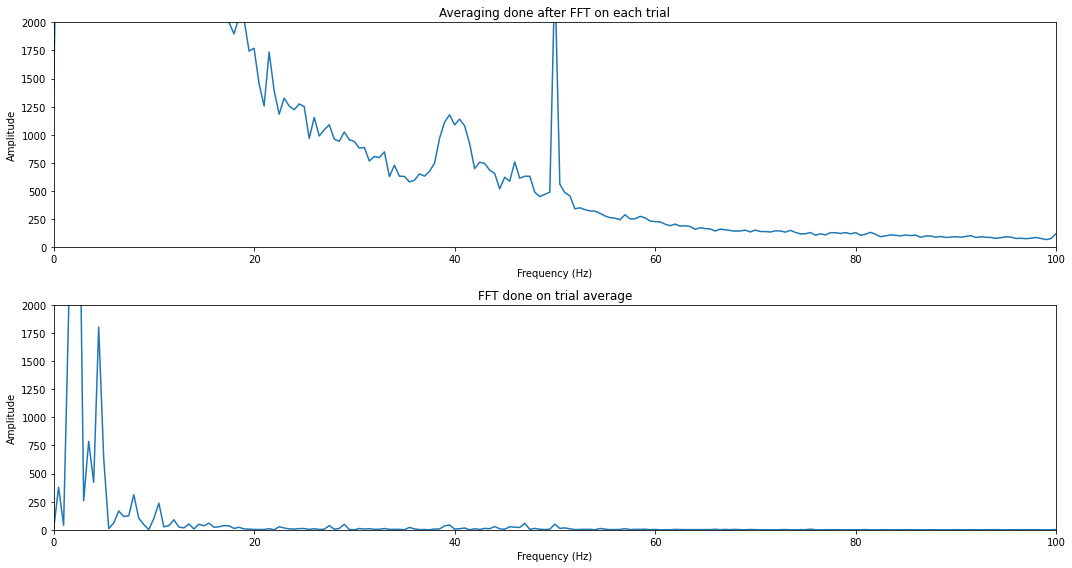

In [128]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(hz, powspectSeparate[:len(hz)])
plt.xlim([0, 100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Averaging done after FFT on each trial')
plt.ylim([0, 2000])

plt.subplot(212)
plt.plot(hz,powspectAverage[:len(hz)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, 100])
plt.title('FFT done on trial average')
plt.ylim([0, 2000])

plt.tight_layout()
plt.show()

In [129]:
#  5) Fourier transform from scratch!
#  Hey, wouldn't it be fun to program the discrete-time Fourier transform
#  from scratch! Yes, of course it would be. Let's do that.
#  Generate a 20-element vector of random numbers.
#  Use the hints below to help you write the Fourier transform.
#  Next, use the fft function on the same data to verify that your FT was accurate.

In [182]:
N = 20 # length of sequence
signal = np.random.randn(1,N).reshape(N) # data
fTime = np.arange(N)/N # "time" used in Fourier transform

In [202]:
# initialize Fourier output matrix
fourierCoefs = np.zeros(signal.shape) + 0j

# loop over frequencies
for fi in range(N):
    
    # create sine wave for this frequency
    fourierSine = np.exp(-2*complex(0,1)*np.pi*fi*fTime)
    
    # compute dot product as sum of point-wise elements
    fourierCoefs[fi] = np.vdot(signal, fourierSine)

# divide by N to scale coefficients properly

fourierCoefs /= N

In [203]:
# for comparison, use the fft function on the same data
fourierCoefsF = fft(signal)/N

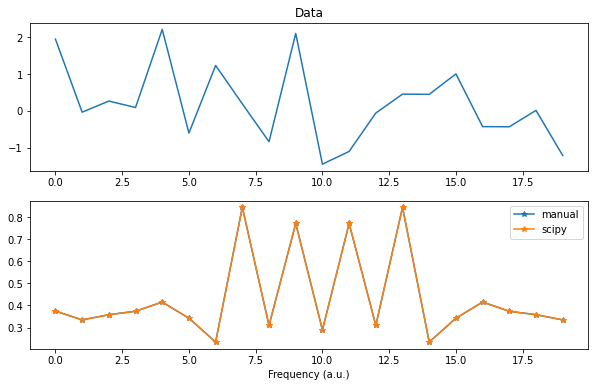

In [204]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(signal)
plt.title('Data')

plt.subplot(212)
plt.plot(np.abs(fourierCoefs)*2,'*-', label='manual')
plt.plot(np.abs(fourierCoefsF)*2,'*-', label='scipy')
plt.xlabel('Frequency (a.u.)')
plt.legend()

plt.show()

In [ ]:
# %% 6) zero-padding and interpolation
# % Compute the power spectrum of channel 7 from the V1 dataset. Take the
# % power spectrum of each trial and then average the power spectra together.
# % But don't use a loop over trials! And use only the data from 0-.5 sec. 
# % What is the frequency resolution?
# % Repeat this procedure, but zero-pad the data to increase frequency
# % resolution. Try some different zero-padding numbers. At what multiple of the native nfft
# % does the increased frequency resolution have no appreciable visible effect on the results?

In [205]:
chan2use = 6

In [234]:
eeg_data['timevec'] = eeg_data['timevec'].reshape(-1)
N = len(eeg_data['timevec'])

In [294]:
lwr = np.isclose(0, eeg_data['timevec'], atol=1e-03).argmax()
uppr = np.isclose(0.5, eeg_data['timevec'], atol=1e-03).argmax()
lwr, uppr

(381, 763)

In [323]:
nfft = 10 * (uppr - lwr+1)
nfft

3830

In [324]:
#  FFT of all trials individually (note that you can do it in one line!)
powspectSeparate = fft(x=eeg_data['csd'][chan2use,lwr:uppr+1,:], 
                       n=nfft,
                       axis=0)
powspectSeparate /= (uppr-lwr+1)
#  Then average the single-trial spectra together (average over trials, not over frequencies)
powspectSeparate = np.mean(np.abs(powspectSeparate)**2,1)

In [325]:
hz = np.linspace(0, srate/2, int(nfft/2+1))

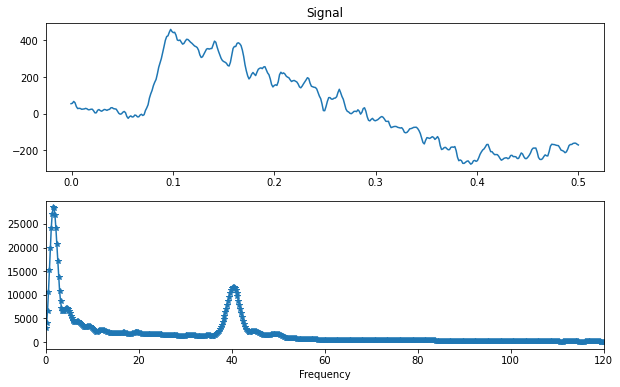

In [328]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(eeg_data['timevec'][lwr:uppr+1],
         np.mean(eeg_data['csd'][chan2use,lwr:uppr+1,:], 1))
plt.title('Signal')

plt.subplot(212)
plt.plot(hz, np.abs(powspectSeparate[:len(hz)]) ,'*-')
plt.xlabel('Frequency')
plt.xlim([0, 120])

plt.show()